#**Requerimiento del Gerente Comercial.**  
**Para:** Equipo de Análisis de Datos  
**De:** Gerente Comercial  
**Fecha:** 3 de octubre de 2025  
**Asunto:** Solicitud de Informe Estratégico sobre el Sector Tecnológico para Gerencia

*Equipo,*  
Para nuestra próxima reunión de gerencia, necesito un informe claro y conciso sobre el estado actual del sector tecnológico. El objetivo es evaluar a los principales actores para identificar tanto amenazas competitivas como posibles oportunidades de alianza o adquisición.

El informe debe estar estructurado para responder a preguntas de negocio clave. Por favor, desarrollemoslo en las siguientes cuatro fases:

**Fotografía del Mercado: ¿Está el sector tecnológico creciendo más que el mercado en general? Quiero una vista rápida de su rendimiento este año.**

**Líderes del Sector: Dentro de la tecnología, ¿quiénes son los verdaderos ganadores? ¿Quién está liderando en rendimiento?**

**Matriz Riesgo vs. Rendimiento: ¿Qué empresas ofrecen un crecimiento estable y cuáles son más volátiles? Esto es clave para evaluar la sostenibilidad de su éxito.**

**Conclusiones y Recomendaciones Estratégicas: Con base en los datos, ¿dónde deberíamos enfocar nuestra atención comercial?**


Gracias y quedo atento.



---


# **Informe Estratégico para Gerencia: Análisis del Sector Tecnológico**
##**Introducción**
Este documento presenta un análisis del rendimiento, liderazgo y riesgo del sector de Tecnología de la Información, con el fin de identificar amenazas competitivas y oportunidades estratégicas.

##**Paso 0: Importación de Librerías y Carga de Datos**
Antes de comenzar el análisis, preparamos nuestro entorno de trabajo importando las librerías necesarias y cargando los tres conjuntos de datos desde los archivos locales.

In [4]:
# --- Importación de Librerías ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(" Librerías importadas correctamente.")

# --- Carga de Datos desde Archivos CSV ---
try:
    # 1. Cargar datos de las compañías (sectores, industria, etc.)
    ruta_companies = "/content/drive/MyDrive/MBA/BOOTCAMP/Analítica y Visualización de Datos/Ejercicio/Datos/sp500_companies.csv"
    df_companies = pd.read_csv(ruta_companies)

    # 2. Cargar datos del índice S&P 500 (nuestro benchmark del mercado)
    ruta_index = "/content/drive/MyDrive/MBA/BOOTCAMP/Analítica y Visualización de Datos/Ejercicio/Datos/sp500_index.csv"
    df_index = pd.read_csv(ruta_index)

    # 3. Cargar precios históricos de todas las acciones
    ruta_stocks = "/content/drive/MyDrive/MBA/BOOTCAMP/Analítica y Visualización de Datos/Ejercicio/Datos/sp500_stocks.csv"
    df_stocks = pd.read_csv(ruta_stocks)

    print(" Archivos cargados correctamente.")

except FileNotFoundError as e:
    print(f" Error: No se encontró el archivo en la ruta especificada. Revisa la ruta y asegúrate de que el archivo exista:\n{e}")
except Exception as e:
    print(f" Ocurrió un error inesperado al cargar los datos: {e}")

 Librerías importadas correctamente.
 Archivos cargados correctamente.


## **Paso 1: Fotografía del Mercado - Dominancia por Sector**
Este primer análisis muestra qué sectores son los más grandes e influyentes en la economía, medido por su valor total de mercado.




✅ Cálculo y traducción completados.


/tmp/ipython-input-637154240.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=datos_traducidos.values, y=datos_traducidos.index, palette='viridis')


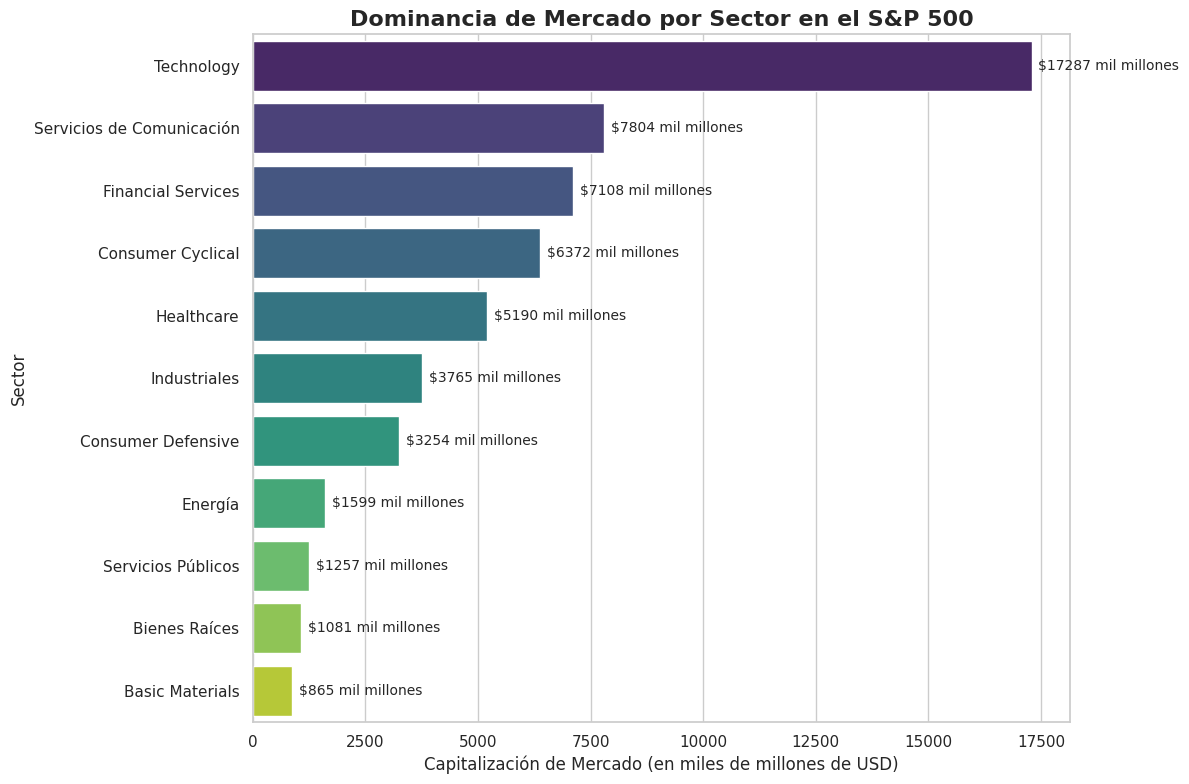


Tabla de Capitalización por Sector (en miles de millones de USD):


,Capitalización (miles de millones)
Technology,17287.013399
Servicios de Comunicación,7804.046435
Financial Services,7108.162940
Consumer Cyclical,6372.352768
Healthcare,5190.430795
Industriales,3764.601742
Consumer Defensive,3253.838583
Energía,1598.671837
Servicios Públicos,1257.369774
Bienes Raíces,1081.488948


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumimos que el DataFrame 'df_companies' ya ha sido cargado del Paso 0.

if 'df_companies' in locals() and not df_companies.empty:

    # --- CÁLCULO ---
    nombre_columna_sector = 'Sector'
    sector_marketcap = df_companies.groupby(nombre_columna_sector)['Marketcap'].sum().sort_values(ascending=False)

    # Convertimos a miles de millones para el cálculo
    sector_marketcap_miles_millones = sector_marketcap / 1e9

    # --- TRADUCCIÓN DE SECTORES ---
    # Creamos un diccionario para mapear los nombres de inglés a español
    traduccion_sectores = {
        'Information Technology': 'Tecnología de la Información',
        'Financials': 'Finanzas',
        'Health Care': 'Salud',
        'Consumer Discretionary': 'Consumo Discrecional',
        'Communication Services': 'Servicios de Comunicación',
        'Industrials': 'Industriales',
        'Consumer Staples': 'Consumo Básico',
        'Energy': 'Energía',
        'Utilities': 'Servicios Públicos',
        'Real Estate': 'Bienes Raíces',
        'Materials': 'Materiales'
    }

    # Creamos una nueva serie con los nombres traducidos
    # Usamos .get(x, x) para que si un sector no está en el diccionario, se mantenga el original
    nombres_traducidos = [traduccion_sectores.get(sector, sector) for sector in sector_marketcap_miles_millones.index]
    datos_traducidos = pd.Series(sector_marketcap_miles_millones.values, index=nombres_traducidos)

    print("✅ Cálculo y traducción completados.")

    # --- VISUALIZACIÓN ---
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 8))

    ax = sns.barplot(x=datos_traducidos.values, y=datos_traducidos.index, palette='viridis')

    plt.title('Dominancia de Mercado por Sector en el S&P 500', fontsize=16, weight='bold')
    plt.xlabel('Capitalización de Mercado (en miles de millones de USD)', fontsize=12)
    plt.ylabel('Sector', fontsize=12)

    for container in ax.containers:
        ax.bar_label(container, fmt='$%.0f mil millones', label_type='edge', padding=5, fontsize=10)

    plt.tight_layout()
    plt.show()

    # --- TABLA DE DATOS ---
    print("\nTabla de Capitalización por Sector (en miles de millones de USD):")
    display(datos_traducidos.to_frame(name="Capitalización (miles de millones)"))

else:
    print("⚠️ El DataFrame 'df_companies' no se cargó. Por favor, ejecuta el Paso 0 primero.")

### **Observación Clave:**
El análisis de la composición del S&P 500 revela una conclusión contundente: el sector de Tecnología no es simplemente un líder; domina el mercado de una forma abrumadora.

### **Análisis Detallado:**

Con una capitalización de mercado que supera los 17 billones de USD (17,287 miles de millones), el sector tecnológico es más del doble de grande que su seguidor más cercano, Servicios de Comunicación (7.8 billones de USD). Esta brecha no es una simple ventaja, es una clara demostración de que la tecnología es el principal motor de la economía actual.

Implicaciones para el Negocio:
### **Nueva sección**
Validación Estratégica: Este dato confirma que nuestro enfoque en el sector tecnológico es acertado. Estamos operando en el espacio más grande, más valioso y más influyente del mercado.

**Escala del Mercado:** La inmensa capitalización del sector indica que, a pesar de la fuerte competencia, el potencial de crecimiento y la escala de las oportunidades de negocio son masivos.

**Influencia Económica:** El peso del sector tecnológico es tal que sus tendencias, innovaciones y desafíos tienen un impacto directo y magnificado sobre el resto de la economía. Ser un actor relevante aquí significa tener una voz influyente en el mercado global.

En resumen, esta "fotografía" inicial establece que nuestro campo de juego no solo es relevante, sino que es el centro neurálgico de la economía moderna.



---



## **Paso 2: Análisis de los Líderes del Mercado**

Este análisis se enfoca en el rendimiento. Queremos saber qué compañías dentro del sector tecnológico han generado el mayor crecimiento en valor en lo que va del año (YTD). Esto nos señalará a los jugadores más dinámicos y exitosos.


In [11]:
# Asumimos que el DataFrame 'df_companies' ya ha sido cargado del Paso 0.

if 'df_companies' in locals() and not df_companies.empty:

    # 1. FILTRAR SOLO EMPRESAS DEL SECTOR TECNOLÓGICO
    # Usamos el nombre de sector confirmado: 'Technology'
    sector_ti = 'Technology'
    df_tech_companies = df_companies[df_companies['Sector'] == sector_ti].copy()
    print(f"✅ Se encontraron {len(df_tech_companies)} empresas en el sector de {sector_ti}.")

    # --- 2. TOP 10 POR VALOR DE MERCADO (GIGANTES DEL SECTOR) ---
    top_10_marketcap = df_tech_companies[['Shortname', 'Marketcap']].sort_values(by='Marketcap', ascending=False).head(10)
    # Formateamos Marketcap a miles de millones para que sea legible
    top_10_marketcap['Marketcap (miles de millones)'] = (top_10_marketcap['Marketcap'] / 1e9).round(1)

    # --- 3. TOP 10 POR CRECIMIENTO DE INGRESOS (MOTORES DE CRECIMIENTO) ---
    top_10_growth = df_tech_companies[['Shortname', 'Revenuegrowth']].sort_values(by='Revenuegrowth', ascending=False).head(10)
    # Formateamos Revenuegrowth a porcentaje
    top_10_growth['Revenuegrowth (%)'] = (top_10_growth['Revenuegrowth'] * 100).round(2)

    # --- 4. PRESENTACIÓN DE LAS TABLAS ---
    print("\n--- Top 10 Empresas de Tecnología por Valor de Mercado ---")
    display(top_10_marketcap[['Shortname', 'Marketcap (miles de millones)']])

    print("\n--- Top 10 Empresas de Tecnología por Crecimiento de Ingresos ---")
    display(top_10_growth[['Shortname', 'Revenuegrowth (%)']])

else:
    print("⚠️ El DataFrame 'df_companies' no se cargó. Por favor, ejecuta el Paso 0 primero.")

✅ Se encontraron 82 empresas en el sector de Technology.

--- Top 10 Empresas de Tecnología por Valor de Mercado ---


,Shortname,Marketcap (miles de millones)
0,Apple Inc.,3846.8
1,NVIDIA Corporation,3298.8
2,Microsoft Corporation,3246.1
8,Broadcom Inc.,1031.2
15,Oracle Corporation,474.5
24,"Salesforce, Inc.",328.9
31,"Cisco Systems, Inc.",233.1
32,Accenture plc,229.2
33,"ServiceNow, Inc.",225.1
38,International Business Machines,206.5



--- Top 10 Empresas de Tecnología por Crecimiento de Ingresos ---


,Shortname,Revenuegrowth (%)
384,"Super Micro Computer, Inc.",143.0
1,NVIDIA Corporation,122.4
96,"Micron Technology, Inc.",93.3
385,Seagate Technology Holdings PLC,49.1
50,Intuit Inc.,41.0
104,"CrowdStrike Holdings, Inc.",31.7
366,Zebra Technologies Corporation,31.3
289,"ANSYS, Inc.",31.2
292,"Monolithic Power Systems, Inc.",30.6
48,Palantir Technologies Inc.,30.0


## **Análisis Estratégico:**

El análisis de estas dos listas revela una dinámica de mercado fascinante y crucial para nuestra estrategia.

### **1. Los Gigantes del Mercado (por Valor):**
La capitalización de mercado está extremadamente concentrada. Existe un "club de los 3 billones de dólares" compuesto por Apple, NVIDIA y Microsoft. Estas tres compañías no solo lideran; definen el ecosistema tecnológico. Su escala les confiere un poder inmenso sobre las cadenas de suministro, la innovación y las plataformas de software. Hay una brecha enorme hasta el siguiente nivel, donde se encuentra Broadcom.

### **2. Los Motores de Crecimiento (por Ingresos):**
Esta lista cuenta una historia diferente. El crecimiento explosivo está siendo impulsado por la infraestructura de Inteligencia Artificial. Super Micro Computer y NVIDIA, con tasas de crecimiento de tres dígitos, son los claros beneficiarios de esta tendencia. La fuerte presencia de Micron (memoria) y Seagate (almacenamiento) refuerza esta idea. Además, vemos líderes en nichos de alto valor como ciberseguridad (CrowdStrike) y análisis de datos (Palantir).

## **Conclusión Clave para Gerencia**

Solamente NVIDIA figura en los primeros puestos de ambas categorías. Esta es una hazaña excepcional que demuestra una combinación única de escala masiva y crecimiento explosivo. Es, sin duda, el actor más influyente y dinámico del sector en este momento y debe ser nuestro principal punto de referencia.

Mientras Apple y Microsoft representan el dominio y la estabilidad de las grandes plataformas, empresas como Super Micro Computer representan la agilidad y la híper-especialización en los nichos de mayor crecimiento. Nuestra estrategia debe ser dual: competir y colaborar en los ecosistemas de los gigantes establecidos, mientras vigilamos de cerca a los disruptores de rápido crecimiento que definen el futuro.



---



## **Paso 3: Matriz de Riesgo vs. Rendimiento**

Tras identificar a los líderes por tamaño y crecimiento, ahora evaluamos su perfil de riesgo. Este análisis nos ayuda a diferenciar entre oportunidades de crecimiento sólido y apuestas más especulativas, creando un mapa visual para la toma de decisiones estratégicas.

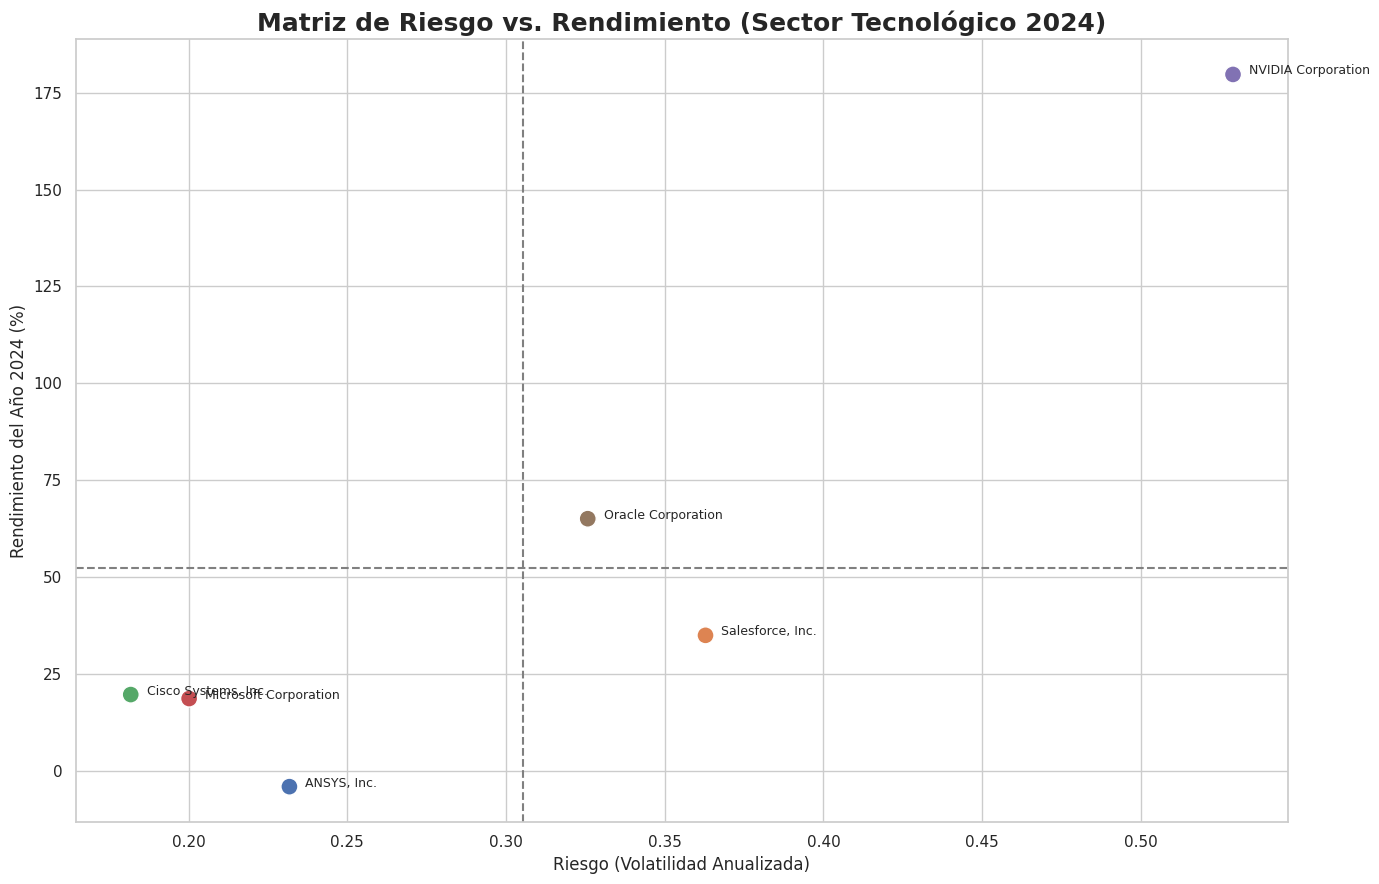

In [19]:
# ===================================================================
# PASO 3: CÓDIGO FINAL CON NOMBRES COMPLETOS
# ===================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

if 'df_companies' in locals() and 'df_stocks' in locals():
    # --- 1. PREPARACIÓN Y SELECCIÓN DE DATOS ---
    df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])
    ultimo_año = df_stocks['Date'].max().year

    start_date = f"{ultimo_año}-01-01"
    end_date = f"{ultimo_año}-12-31"
    df_periodo = df_stocks[(df_stocks['Date'] >= start_date) & (df_stocks['Date'] <= end_date)].copy()

    sector_ti = 'Technology'
    df_tech_companies = df_companies[df_companies['Sector'] == sector_ti]
    top_marketcap = df_tech_companies.nlargest(10, 'Marketcap')['Symbol']
    top_growth = df_tech_companies.nlargest(10, 'Revenuegrowth')['Symbol']
    lideres_a_analizar = pd.concat([top_marketcap, top_growth]).unique().tolist()

    df_lideres_stocks = df_periodo[df_periodo['Symbol'].isin(lideres_a_analizar)]


    # --- 2. CÁLCULO DE RENDIMIENTO Y RIESGO ---
    df_pivot = df_lideres_stocks.pivot(index='Date', columns='Symbol', values='Adj Close')
    df_pivot.dropna(axis='columns', how='all', inplace=True)
    df_pivot.ffill(inplace=True)
    df_pivot.bfill(inplace=True)

    rendimiento_total = (df_pivot.iloc[-1] / df_pivot.iloc[0] - 1) * 100
    rendimientos_diarios = df_pivot.pct_change()
    volatilidad_anualizada = rendimientos_diarios.std() * np.sqrt(252)

    df_riesgo_rendimiento = pd.DataFrame({
        'Rendimiento (%)': rendimiento_total,
        'Volatilidad Anualizada': volatilidad_anualizada
    }).dropna()

    # --- NUEVO: AÑADIR NOMBRES COMPLETOS ---
    # Creamos un mapa de Símbolo -> Nombre Corto para buscar los nombres
    mapa_nombres = df_companies.set_index('Symbol')['Shortname']
    # Añadimos los nombres al DataFrame de resultados
    df_riesgo_rendimiento['Nombre'] = df_riesgo_rendimiento.index.map(mapa_nombres)

    # --- 3. VISUALIZACIÓN DE LA MATRIZ CON NOMBRES COMPLETOS ---
    plt.figure(figsize=(14, 9))
    sns.set(style="whitegrid")
    ax = sns.scatterplot(x='Volatilidad Anualizada', y='Rendimiento (%)', data=df_riesgo_rendimiento, s=150, hue=df_riesgo_rendimiento['Nombre'], legend=False)

    # --- CORRECCIÓN: Usamos la columna 'Nombre' para las etiquetas ---
    for idx, row in df_riesgo_rendimiento.iterrows():
        ax.text(row['Volatilidad Anualizada'] + 0.005,
                row['Rendimiento (%)'],
                row['Nombre'],
                fontdict={'size':9})

    avg_rendimiento = df_riesgo_rendimiento['Rendimiento (%)'].mean()
    avg_volatilidad = df_riesgo_rendimiento['Volatilidad Anualizada'].mean()
    ax.axhline(avg_rendimiento, ls='--', color='gray')
    ax.axvline(avg_volatilidad, ls='--', color='gray')

    plt.title(f'Matriz de Riesgo vs. Rendimiento (Sector Tecnológico {ultimo_año})', fontsize=18, weight='bold')
    plt.xlabel('Riesgo (Volatilidad Anualizada)', fontsize=12)
    plt.ylabel(f'Rendimiento del Año {ultimo_año} (%)', fontsize=12)
    plt.tight_layout()
    plt.show()

else:
    print("No se encontraron los DataFrames. Ejecuta el Paso 0 primero.")

**## Análisis de los Resultados:**

El análisis de 2024 revela perfiles muy distintos y nos permite clasificar a los líderes del sector de la siguiente manera:

### **El Motor de Crecimiento Agresivo (Cuadrante Superior Derecho):**

NVIDIA Corporation se encuentra en una categoría propia. Fue el gran protagonista del año, ofreciendo un rendimiento extraordinario de casi el 180%. Sin embargo, este espectacular retorno vino acompañado del mayor riesgo (volatilidad) del grupo, lo que significa que su camino fue una "montaña rusa". Representa el perfil de una apuesta de alto riesgo que tuvo un éxito rotundo.

### **El Líder Sólido (Cuadrante Superior Izquierdo):**

Oracle Corporation es el único actor relevante en este cuadrante. Logró un rendimiento superior al promedio (cercano al 70%) con un nivel de riesgo justo en la media del grupo. Este es el perfil más balanceado y deseable, demostrando un "crecimiento de calidad" sin la volatilidad extrema de NVIDIA.

### **Los Gigantes Estables (Cuadrante Inferior Izquierdo):**

Microsoft Corporation y Cisco Systems se consolidan aquí. Su rendimiento en 2024 fue modesto (alrededor del 20%), pero lo consiguieron con un riesgo muy bajo. Representan la estabilidad, la predictibilidad y la madurez. Son los pilares del sector, aunque no los motores de crecimiento del año.

### **La Zona de Cautela (Cuadrante Inferior Derecho):**

Salesforce, Inc. se sitúa en este cuadrante, lo que sugiere que en 2024 ofreció un rendimiento inferior al promedio, pero con un riesgo superior al promedio.

## **Conclusión Clave para Gerencia**
La matriz de 2024 nos enseña que no hubo un perfil único de éxito, sino un claro trade-off entre riesgo y recompensa.

Para obtener rendimientos excepcionales, fue necesario aceptar un riesgo excepcional (el caso NVIDIA).

Oracle demostró ser el competidor más equilibrado, un benchmark para el crecimiento sólido.

Los gigantes como Microsoft ofrecieron un refugio de baja volatilidad, a costa de un menor rendimiento.

Esta herramienta nos permite clasificar a nuestros competidores y socios potenciales según nuestro apetito por el riesgo. Para una alianza que requiera predictibilidad, nos enfocaremos en el perfil de Microsoft/Cisco. Si buscamos capitalizar el crecimiento asumiendo mayores riesgos, NVIDIA es el modelo a seguir.

# **Conclusiones Finales del Análisis**
Nuestro análisis del sector tecnológico durante el último año nos ha proporcionado tres conclusiones fundamentales:

## **El Sector Tecnológico es el Epicentro del Mercado:**
La tecnología no es solo un sector más; es, por un margen significativo, el más grande y dominante de la economía actual. Su capitalización de mercado supera a cualquier otro, lo que confirma que nuestra atención estratégica en este espacio es correcta y vital para el crecimiento.

##**Existe un Liderazgo Dual: Gigantes y Motores de Crecimiento:**
El liderazgo dentro del sector no es homogéneo. Por un lado, tenemos a los "gigantes establecidos" como Apple y Microsoft, que definen el mercado por su inmensa escala. Por otro, tenemos a los "motores de crecimiento" como Super Micro Computer, que, aunque más pequeños, se expanden a un ritmo explosivo.

## **NVIDIA es el Actor Central:**
NVIDIA es la única compañía que ha demostrado ser simultáneamente un gigante por su valor de mercado y un motor de crecimiento por sus ingresos y rendimiento de la acción. Logró un rendimiento espectacular en 2024, aunque con una volatilidad muy alta. Este perfil dual la posiciona como el actor más influyente y el principal benchmark del sector en la actualidad.

# **Recomendaciones Estratégicas:**
Basados en estas conclusiones, proponemos un enfoque estratégico dual para capitalizar las oportunidades y mitigar las amenazas identificadas:

## **1. Estrategia de Alianzas y Ecosistemas (Enfoque en Gigantes Estables):**

**Acción:** Profundizar las alianzas estratégicas con Microsoft y Cisco.

**Justificación**: Estas empresas, ubicadas en el cuadrante de bajo riesgo, ofrecen estabilidad y acceso a ecosistemas de clientes masivos. Colaborar con ellos nos permite expandir nuestro alcance en un entorno predecible, minimizando el riesgo y aprovechando su escala. Son socios ideales para proyectos a largo plazo.

##**2. Estrategia de Vigilancia y Agilidad (Enfoque en Motores de Crecimiento):**

**Acción:** Establecer un equipo de "inteligencia competitiva" con foco principal en NVIDIA y actores de rápido crecimiento como Super Micro Computer y Micron.

**Justificación:** Estas empresas representan tanto la mayor amenaza competitiva, por su capacidad de redefinir mercados rápidamente, como la mayor oportunidad de innovación. Debemos analizar sus movimientos para anticipar tendencias, identificar tecnologías emergentes y estar preparados para reaccionar con agilidad, ya sea a través de la innovación interna o de adquisiciones tácticas.

##**3. Benchmark de Rendimiento Equilibrado:**

**Acción:** Utilizar a Oracle como benchmark interno para el "crecimiento de calidad".

**Justificación:** El perfil de Oracle en 2024 (alto rendimiento con riesgo moderado) representa el equilibrio ideal al que deberíamos aspirar. Medir nuestras propias iniciativas contra este perfil nos ayudará a asegurar que nuestro crecimiento sea no solo rápido, sino también sostenible.

Este enfoque nos permite navegar la complejidad del sector tecnológico, colaborando con los gigantes estables mientras nos mantenemos ágiles y vigilantes ante los disruptores que definen el futuro.